
# Weather Classification Model

**Goal:** Build a machine learning model to classify weather into four categories:
- Sunny
- Rainy
- Cloudy
- Snowy

**Steps in this Notebook:**
1. **Load Libraries** – Import all necessary Python libraries.
2. **Load Dataset** – Read the weather dataset.
3. **Preprocessing** – Encode categorical variables, scale numerical features, handle missing/duplicate values.
4. **Train-Test Split** – Split dataset into training and testing sets.
5. **Model Training** – Train Logistic Regression, SVM, and Random Forest models.
6. **Evaluation** – Evaluate models using accuracy, precision, recall, F1-score, and confusion matrices.
7. **Model Comparison** – Summarize model performance and select the best one.
8. **Export Model** – Save the best-performing model for later use in the Streamlit app.


# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score ,roc_curve ,classification_report, confusion_matrix
import joblib

# Loading dataset

In [2]:
df = pd.read_csv('../data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# Preprocessing
- Missing & duplicate checks already handled in `01_eda` notebook.  
- We'll continue with **encoding** and **standardization** here.  
- No feature engineering (e.g., PCA or feature selection) since dataset is small.


In [3]:
# Identify categorical and numerical columns
object_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

## Encoding Categorical Features

In [4]:
# Encode categorical variables
for col in object_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [9]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


### Encoded Labels (Weather Type)
- **Cloudy → 0**  
- **Rainy → 1**  
- **Snowy → 2**  
- **Sunny → 3**

## Splitting & Scaling Data

In [5]:
# Split the data
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# Split the data into training and testing sets with stratification
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

## Evaluation Function

In [6]:
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n Model: {model_name}")
    print("="*60)
    
    # Detailed classification report
    print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("="*60)

    # Confusion matrix visualization
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Model Training & Evaluation


 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       660
           1       0.84      0.86      0.85       660
           2       0.90      0.91      0.91       660
           3       0.87      0.81      0.84       660

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640

Accuracy:  0.8538
Precision: 0.8544
Recall:    0.8538
F1 Score:  0.8537


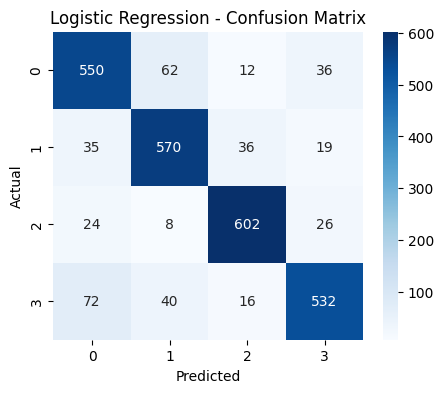


 Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       660
           1       0.91      0.91      0.91       660
           2       0.96      0.91      0.93       660
           3       0.94      0.90      0.92       660

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Accuracy:  0.9072
Precision: 0.9101
Recall:    0.9072
F1 Score:  0.9079


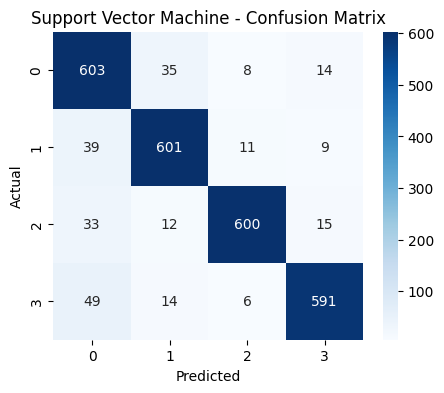


 Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       660
           1       0.90      0.91      0.91       660
           2       0.96      0.91      0.93       660
           3       0.94      0.92      0.93       660

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Accuracy:  0.9155
Precision: 0.9169
Recall:    0.9155
F1 Score:  0.9159


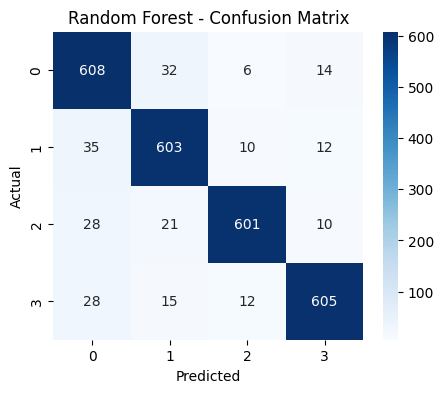

In [7]:
# Model training and evaluation 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    evaluate_model(model_name,y_test, y_pred)


# **Model Performance Summary**

| Model                  | Accuracy | Precision | Recall  | F1 Score |
|------------------------|-----------|-----------|----------|----------|
| Logistic Regression    | 0.8538    | 0.8544    | 0.8538   | 0.8537   |
| Support Vector Machine | 0.9072    | 0.9101    | 0.9072   | 0.9079   |
| Random Forest          | 0.9155    | 0.9169    | 0.9155   | 0.9159   |

---

### **Observations**
- **Random Forest** achieved the **best overall performance** across all evaluation metrics (Accuracy ≈ 91.6%).  
- **SVM** also performed strongly, slightly below Random Forest but clearly better than Logistic Regression.  
- **Logistic Regression** serves as a solid **baseline model**, maintaining consistent results (~85% accuracy).  
- The performance gap between SVM and Random Forest indicates that **ensemble methods** like Random Forest can capture more complex patterns compared to margin-based models like SVM.  


# Exporting the Best Model

In [8]:
# Save the best model (Random Forest performed the best)
best_model = models['Random Forest']
joblib.dump(best_model, '../models/weather_classification_model.pkl')

['../models/weather_classification_model.pkl']